In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from meteostat import Point, Daily, Hourly
from datetime import datetime
from geopy.geocoders import Nominatim
from sklearn.preprocessing import OneHotEncoder

plt.style.use('ggplot')    # стиль графиков
%matplotlib inline

c:\Users\HYPERPC\jupyter\Магистратура\МатСтат\.conda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [5]:
pd.set_option('display.max_columns', None)

In [3]:
pd.reset_option('display.max_columns')

In [8]:
df1 = pd.read_csv('Moscow_data_2018_2024.csv', skiprows=6, on_bad_lines='skip', sep=';')
df1

,Местное время в Москве (ВДНХ),T,Po,P,Pa,U,DD,Ff,ff10,ff3,...,Cm,Ch,VV,Td,RRR,tR,E,Tg,E',sss
31.05.2024 21:00,18.1,749.4,762.6,1.6,88.0,"Ветер, дующий с северо-запада",1,NaN,NaN,100%.,...,NaN,20.0,16.1,7.0,12.0,NaN,NaN,NaN,NaN,NaN
31.05.2024 18:00,27.2,747.8,760.6,-0.2,39.0,"Ветер, дующий с востоко-юго-востока",3,NaN,NaN,"90 или более, но не 100%",...,"Перистых, перисто-кучевых или перисто-слоистых...",17.0,11.9,Следы осадков,12.0,NaN,NaN,NaN,NaN,NaN
31.05.2024 15:00,29.8,748.0,760.7,-0.6,30.0,"Ветер, дующий с востоко-юго-востока",1,NaN,NaN,70 – 80%.,...,"Перистых, перисто-кучевых или перисто-слоистых...",20.0,10.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.05.2024 12:00,28.4,748.6,761.3,0.1,32.0,"Ветер, дующий с востоко-юго-востока",2,NaN,NaN,Облаков нет.,...,NaN,20.0,10.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31.05.2024 09:00,26.1,748.5,761.3,0.1,35.0,"Ветер, дующий с востоко-северо-востока",1,NaN,NaN,Облаков нет.,...,NaN,20.0,9.3,Осадков нет,12.0,"Cухая (без трещин, заметного количества пыли и...",14.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27.01.2018 12:00,-4.5,761.2,776.7,-0.3,83.0,"Ветер, дующий с юга",1,NaN,NaN,100%.,...,NaN,10.0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27.01.2018 09:00,-6.3,761.5,777.0,0.1,85.0,"Ветер, дующий с юга",2,NaN,NaN,100%.,...,NaN,10.0,-8.5,Осадков нет,12.0,NaN,NaN,Ровный слой сухого рассыпчатого снега покрывае...,17.0,NaN
27.01.2018 06:00,-6.8,761.4,776.9,0.1,74.0,"Ветер, дующий с юга",1,NaN,NaN,100%.,...,NaN,NaN,-10.7,Осадков нет,12.0,NaN,NaN,NaN,NaN,NaN
27.01.2018 03:00,-5.1,761.3,776.8,0.6,65.0,"Ветер, дующий с юга",1,NaN,NaN,100%.,...,NaN,NaN,-10.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
columns = df1.columns.to_list()
columns.remove('Местное время в Москве (ВДНХ)')
df1.columns = columns + [None]
del df1[None]

In [10]:
df1.reset_index(inplace=True)

In [11]:
df1['index'] = pd.to_datetime(df1['index'], format='%d.%m.%Y %H:%M')
# df1 = df1[df1['index'].dt.time == pd.to_datetime('15:00').time()]
# df1['index'] = df1['index'].dt.date
df1.set_index('index', inplace=True)
df1.index.name = None

In [12]:
df1 = df1.drop(['ff10','ff3','WW','W1','W2','Tn','Tx','Cl','Ch','tR','E','RRR','Tg',"E'",'sss','Cm','Nh','Ff','H'], axis=1)
df1 = df1.iloc[::-1]

In [14]:
df1.head()

,T,Po,P,Pa,U,DD,N,VV,Td
2018-01-27 00:00:00,-3.9,760.7,776.1,0.4,48.0,"Ветер, дующий с юга",100%.,NaN,-13.3
2018-01-27 03:00:00,-5.1,761.3,776.8,0.6,65.0,"Ветер, дующий с юга",100%.,NaN,-10.7
2018-01-27 06:00:00,-6.8,761.4,776.9,0.1,74.0,"Ветер, дующий с юга",100%.,NaN,-10.7
2018-01-27 09:00:00,-6.3,761.5,777.0,0.1,85.0,"Ветер, дующий с юга",100%.,10.0,-8.5
2018-01-27 12:00:00,-4.5,761.2,776.7,-0.3,83.0,"Ветер, дующий с юга",100%.,10.0,-7.0


In [16]:
# Функция для получения координат города
def get_city_coordinates(city_name):
    geolocator = Nominatim(user_agent="weather_data_fetcher")
    location = geolocator.geocode(city_name)
    return location.latitude, location.longitude

city_name = "Moscow"
latitude, longitude = get_city_coordinates(city_name)

# start = datetime(2005, 2, 1)
# end = datetime(2024, 5, 26)
start = datetime(2018, 1, 27)
end = datetime(2024, 5, 31, 23, 59)


location = Point(latitude, longitude)

# df2 = Hourly(location, start, end)
df2 = Hourly('27612', start, end)
df2 = df2.fetch()

df2

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
time,,,,,,,,,,,
2018-01-27 00:00:00,-5.1,-10.7,65.0,NaN,NaN,180.0,4.0,NaN,1035.6,NaN,4.0
2018-01-27 03:00:00,-6.8,-10.7,74.0,NaN,NaN,180.0,4.0,NaN,1035.8,NaN,4.0
2018-01-27 06:00:00,-6.3,-8.6,84.0,NaN,170.0,170.0,7.0,NaN,1035.9,NaN,4.0
2018-01-27 09:00:00,-4.5,-6.9,83.0,NaN,NaN,170.0,4.0,NaN,1035.5,NaN,4.0
2018-01-27 12:00:00,-3.5,-8.6,68.0,NaN,NaN,160.0,7.0,NaN,1033.9,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 19:00:00,21.4,13.3,60.0,0.0,NaN,205.0,0.0,NaN,1015.5,NaN,2.0
2024-05-31 20:00:00,20.3,13.3,64.0,0.0,NaN,145.0,0.0,NaN,1015.6,NaN,2.0
2024-05-31 21:00:00,16.4,15.4,94.0,0.0,NaN,0.0,0.0,NaN,1016.3,NaN,2.0


In [17]:
df2.reset_index(inplace=True)
df2['time'] = pd.to_datetime(df2['time'], format='%d.%m.%Y %H:%M')
df2[df2['time'].dt.hour % 3 == 0]
# df2['time'] = df2['time'].dt.date
df2.set_index('time', inplace=True)
df2.index.name = None

In [18]:
df2 = df2.drop(list(set(df2.index) - set(df1.index) & set(df2.index)))

In [19]:
df2 = df2.drop(['snow', 'wpgt', 'tsun'], axis=1)

In [21]:
df2

,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
2018-01-27 00:00:00,-5.1,-10.7,65.0,NaN,180.0,4.0,1035.6,4.0
2018-01-27 03:00:00,-6.8,-10.7,74.0,NaN,180.0,4.0,1035.8,4.0
2018-01-27 06:00:00,-6.3,-8.6,84.0,NaN,170.0,7.0,1035.9,4.0
2018-01-27 09:00:00,-4.5,-6.9,83.0,NaN,170.0,4.0,1035.5,4.0
2018-01-27 12:00:00,-3.5,-8.6,68.0,NaN,160.0,7.0,1033.9,4.0
...,...,...,...,...,...,...,...,...
2024-05-31 09:00:00,28.4,10.1,32.0,0.0,110.0,7.0,1015.0,2.0
2024-05-31 12:00:00,29.8,10.4,30.0,0.0,110.0,4.0,1014.2,2.0
2024-05-31 15:00:00,27.2,12.0,39.0,0.0,120.0,11.0,1014.0,3.0
2024-05-31 18:00:00,18.1,16.1,88.0,0.0,310.0,4.0,1016.7,2.0


In [22]:
dataset = pd.concat([df1, df2], axis=1)
dataset.head()

,T,Po,P,Pa,U,DD,N,VV,Td,temp,dwpt,rhum,prcp,wdir,wspd,pres,coco
2018-01-27 00:00:00,-3.9,760.7,776.1,0.4,48.0,"Ветер, дующий с юга",100%.,NaN,-13.3,-5.1,-10.7,65.0,NaN,180.0,4.0,1035.6,4.0
2018-01-27 03:00:00,-5.1,761.3,776.8,0.6,65.0,"Ветер, дующий с юга",100%.,NaN,-10.7,-6.8,-10.7,74.0,NaN,180.0,4.0,1035.8,4.0
2018-01-27 06:00:00,-6.8,761.4,776.9,0.1,74.0,"Ветер, дующий с юга",100%.,NaN,-10.7,-6.3,-8.6,84.0,NaN,170.0,7.0,1035.9,4.0
2018-01-27 09:00:00,-6.3,761.5,777.0,0.1,85.0,"Ветер, дующий с юга",100%.,10.0,-8.5,-4.5,-6.9,83.0,NaN,170.0,4.0,1035.5,4.0
2018-01-27 12:00:00,-4.5,761.2,776.7,-0.3,83.0,"Ветер, дующий с юга",100%.,10.0,-7.0,-3.5,-8.6,68.0,NaN,160.0,7.0,1033.9,4.0


In [33]:
dataset = pd.concat([df1, df2], axis=1)
dataset.index.name = "date"
dataset = dataset[['temp', 'Po', 'Pa', 'rhum', 'DD', 'wspd', 'N', 'dwpt', 'pres']]

# Убираем пропуски
dataset['temp'] = dataset['temp'].ffill()
dataset['Po'] = dataset['Po'].ffill()
dataset['Pa'] = dataset['Pa'].ffill()
dataset['dwpt'] = dataset['dwpt'].ffill()
dataset['rhum'] = dataset['rhum'].ffill()
dataset['wspd'] = dataset['wspd'].ffill()
dataset['pres'] = dataset['pres'].ffill()
dataset['N'] = dataset['N'].ffill()
# dataset['H'] = dataset['H'].ffill()

In [34]:
# dataset.columns = ['t', 'Po', 'P', 'relative_humidity', 'daily_precipitation_mm', 'Direction_wind', 'wind_speed', 'cloudy', 'cloud_height', 'visibility_range']
dataset.columns = ['T', 'Po', 'Pa', 'Относительная влажность в %', 'Направление ветра', 'Скорость ветра', 'Облачность', 'Точка росы', 'Среднее давление']

In [35]:
dataset.head()

,T,Po,Pa,Относительная влажность в %,Направление ветра,Скорость ветра,Облачность,Точка росы,Среднее давление
2018-01-27 00:00:00,-5.1,760.7,0.4,65.0,"Ветер, дующий с юга",4.0,100%.,-10.7,1035.6
2018-01-27 03:00:00,-6.8,761.3,0.6,74.0,"Ветер, дующий с юга",4.0,100%.,-10.7,1035.8
2018-01-27 06:00:00,-6.3,761.4,0.1,84.0,"Ветер, дующий с юга",7.0,100%.,-8.6,1035.9
2018-01-27 09:00:00,-4.5,761.5,0.1,83.0,"Ветер, дующий с юга",4.0,100%.,-6.9,1035.5
2018-01-27 12:00:00,-3.5,761.2,-0.3,68.0,"Ветер, дующий с юга",7.0,100%.,-8.6,1033.9


In [37]:
replacement_dict_1 = {
    '60%.': 0.6,
    '90  или более, но не 100%': 0.9,
    '100%.': 1,
    '70 – 80%.': 0.75,
    'Облаков нет.': 0,
    '50%.': 0.5,
    '20–30%.' : 0.25,
    '40%.' : 0.4,
    '10%  или менее, но не 0' : 0.1,
    'Небо не видно из-за тумана и/или других метеорологических явлений.' : 0.5
}

# Замена значений
dataset['Облачность'] = dataset['Облачность'].replace(replacement_dict_1)

In [41]:
# replacement_dict_2 = {
#     '1000-1500': 1250,
#     '600-1000': 800,
#     '300-600': 450,
#     '2500 или более, или облаков нет.': 2750,
#     '200-300': 250,
#     '2000-2500': 2250
# }

# # Замена значений
# dataset['Высота облаков'] = dataset['Высота облаков'].replace(replacement_dict_2)

In [38]:
encoder = OneHotEncoder(sparse=False)

onehot_columns = encoder.fit_transform(dataset[['Направление ветра']])
one_hot_df = pd.DataFrame(onehot_columns, columns=encoder.get_feature_names_out(['Направление ветра']))
one_hot_df.index = dataset.index

dataset = pd.concat([dataset, one_hot_df], axis=1)
dataset.drop('Направление ветра', axis=1, inplace=True)


In [39]:
dataset

,T,Po,Pa,Относительная влажность в %,Скорость ветра,Облачность,Точка росы,Среднее давление,"Направление ветра_Ветер, дующий с востока","Направление ветра_Ветер, дующий с востоко-северо-востока",...,"Направление ветра_Ветер, дующий с северо-запада","Направление ветра_Ветер, дующий с северо-северо-востока","Направление ветра_Ветер, дующий с северо-северо-запада","Направление ветра_Ветер, дующий с юга","Направление ветра_Ветер, дующий с юго-востока","Направление ветра_Ветер, дующий с юго-запада","Направление ветра_Ветер, дующий с юго-юго-востока","Направление ветра_Ветер, дующий с юго-юго-запада",Направление ветра_Переменное направление,"Направление ветра_Штиль, безветрие"
2018-01-27 00:00:00,-5.1,760.7,0.4,65.0,4.0,1.00,-10.7,1035.6,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-27 03:00:00,-6.8,761.3,0.6,74.0,4.0,1.00,-10.7,1035.8,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-27 06:00:00,-6.3,761.4,0.1,84.0,7.0,1.00,-8.6,1035.9,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-27 09:00:00,-4.5,761.5,0.1,83.0,4.0,1.00,-6.9,1035.5,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2018-01-27 12:00:00,-3.5,761.2,-0.3,68.0,7.0,1.00,-8.6,1033.9,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-31 09:00:00,28.4,748.5,0.1,32.0,7.0,0.00,10.1,1015.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-31 12:00:00,29.8,748.6,0.1,30.0,4.0,0.00,10.4,1014.2,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-31 15:00:00,27.2,748.0,-0.6,39.0,11.0,0.75,12.0,1014.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-05-31 18:00:00,18.1,747.8,-0.2,88.0,4.0,0.90,16.1,1016.7,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

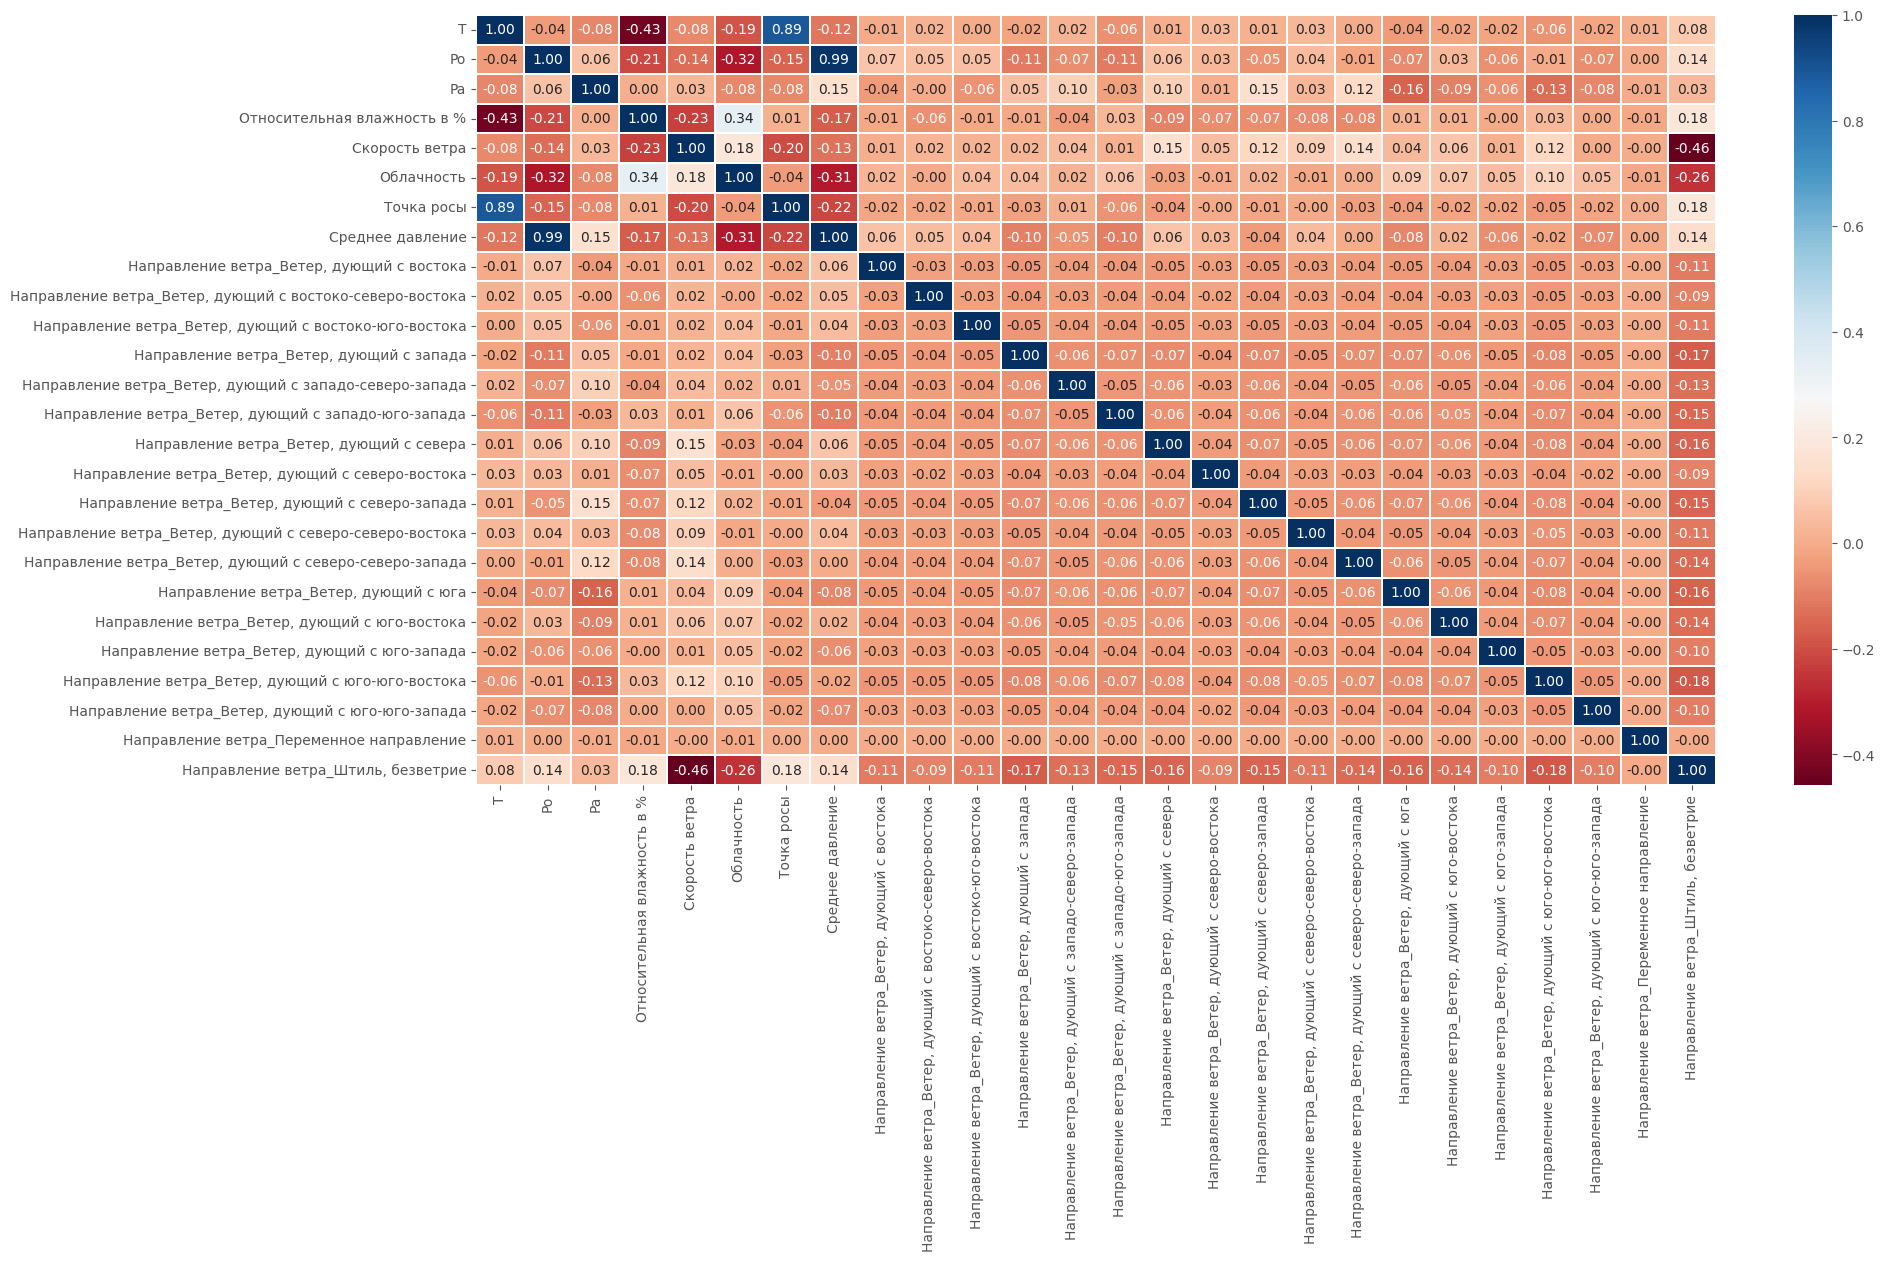

In [40]:
fig, ax = plt.subplots(figsize=(20, 10), dpi = 100)
sns.heatmap(dataset.corr(method='pearson'), linewidths= .3, annot=True, fmt=".2f", cmap= 'RdBu')

In [41]:
dataset.index.name = "date"

In [42]:
dataset.to_csv('dataset.csv')